In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
import string

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\helit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\helit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\helit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
df = pd.read_csv("dataset/windows10comments.csv", sep=';', index_col=[0])

In [6]:
df.head()

,text,date
0,"Mielőtt kommentelsz, olvasd el az Összefoglaló...",\n\t\t\t\t\t\t\tUtoljára frissítve: 2020-05-31...
1,Windows 9A Microsoft a híresztelések szerint a...,\n2014-07-02 20:43:20\n
2,"Az a start menü jól néz ki, meg a metro appok ...",\n2014-07-02 20:48:30\n
3,Nekem nem tetszik annyira... hiányolom a kikap...,\n2014-07-02 20:53:41\n
4,Ott a shut down a képen,\n2014-07-02 20:54:13\n


In [7]:
df = df[df["date"].str.contains('Utoljára frissítve')==False]

In [8]:
print(f"Length:\n{len(df)}\n")
print(f"dtypes:\n{df.dtypes}\n")
print(f"NaN rows:\n{df.isna().sum()}")

Length:
146076

dtypes:
text    object
date    object
dtype: object

NaN rows:
text    516
date      0
dtype: int64


In [9]:
df = df.replace('\n','', regex=True)

In [10]:
df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)

text            object
date    datetime64[ns]
dtype: object


In [11]:
df = df.reset_index(drop=True)

In [12]:
df

,text,date
0,Windows 9A Microsoft a híresztelések szerint a...,2014-07-02 20:43:20
1,"Az a start menü jól néz ki, meg a metro appok ...",2014-07-02 20:48:30
2,Nekem nem tetszik annyira... hiányolom a kikap...,2014-07-02 20:53:41
3,Ott a shut down a képen,2014-07-02 20:54:13
4,"Sokaknak megkönnyebbülés lesz az új W9, bár én...",2014-07-02 20:55:30
...,...,...
146071,"Köszi, a jelzett frissítések rendben vannak, a...",2023-01-04 11:20:47
146072,"Végülis nem tudtam megakadályozni, hogy feltel...",2023-01-04 13:32:01
146073,"Adatmentő / visszaállító kérdés, de hátha itt ...",2023-01-04 14:01:34
146074,"A másik topikban már kaptál válaszokat, linkel...",2023-01-04 14:26:52


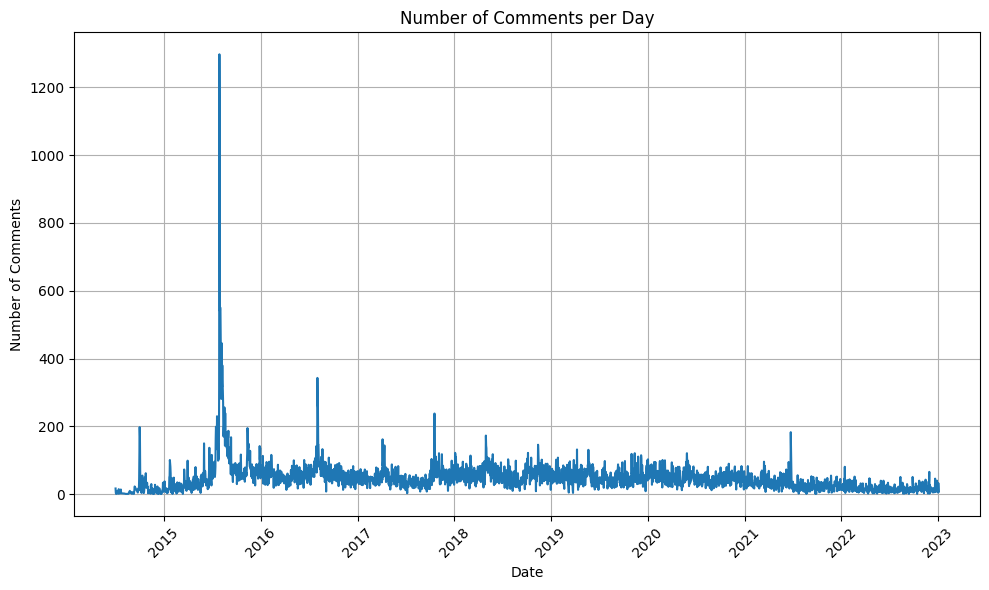

In [13]:
comments_per_day = df['date'].dt.date.value_counts().sort_index()

plt.figure(figsize=(10, 6))
comments_per_day.plot(linestyle='-')
plt.title('Number of Comments per Day')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

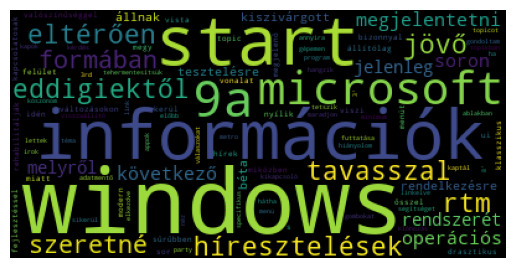

In [14]:
stop = set(stopwords.words('hungarian'))
df['text'] = df['text'].apply(lambda x: str(x) if isinstance(x, (str, np.generic)) else '')
df['text_no_sw'] = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x.lower()) if word not in stop]))

text = df['text_no_sw'].values 
wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
# Sentiment analysis
sid = SentimentIntensityAnalyzer()
df['sentiment'] = df['text_no_sw'].apply(lambda x: sid.polarity_scores(x)['compound'])

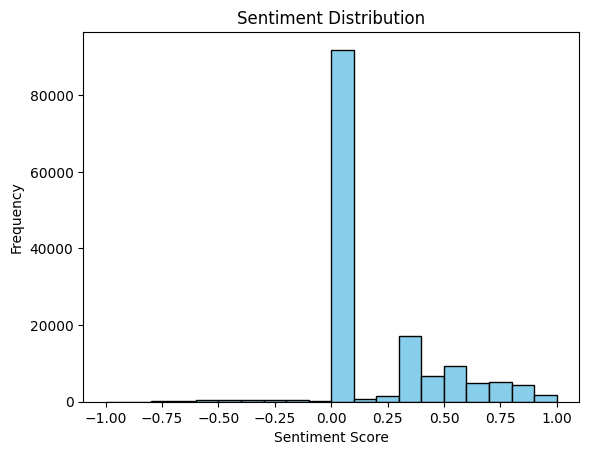

In [16]:
# Plotting sentiment distribution
plt.hist(df['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

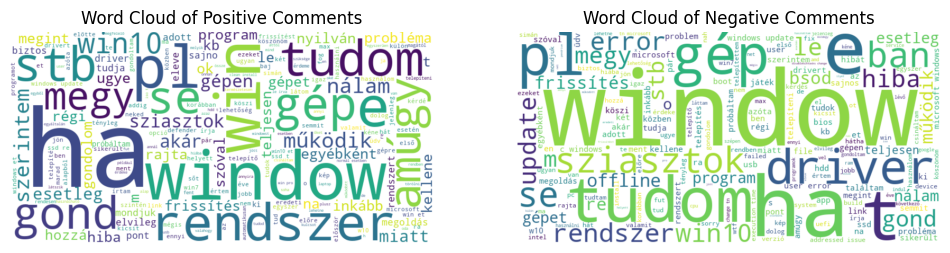

In [17]:
# Word cloud of positive and negative comments
positive_comments = ' '.join(df[df['sentiment'] > 0]['text_no_sw'])
negative_comments = ' '.join(df[df['sentiment'] < 0]['text_no_sw'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud of Positive Comments')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_comments)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud of Negative Comments')
plt.axis('off')

plt.show()

In [18]:
df

,text,date,text_no_sw,sentiment
0,Windows 9A Microsoft a híresztelések szerint a...,2014-07-02 20:43:20,windows 9a microsoft híresztelések eddigiektől...,0.0000
1,"Az a start menü jól néz ki, meg a metro appok ...",2014-07-02 20:48:30,"start menü néz , metro appok ablakban futtatás...",0.4019
2,Nekem nem tetszik annyira... hiányolom a kikap...,2014-07-02 20:53:41,tetszik annyira ... hiányolom kikapcsoló gombo...,0.0000
3,Ott a shut down a képen,2014-07-02 20:54:13,shut down képen,0.0000
4,"Sokaknak megkönnyebbülés lesz az új W9, bár én...",2014-07-02 20:55:30,"sokaknak megkönnyebbülés w9 , személy w8-at be...",0.0000
...,...,...,...,...
146071,"Köszi, a jelzett frissítések rendben vannak, a...",2023-01-04 11:20:47,"köszi , jelzett frissítések rendben , többi jö...",0.0000
146072,"Végülis nem tudtam megakadályozni, hogy feltel...",2023-01-04 13:32:01,"végülis tudtam megakadályozni , feltelepítse o...",0.0000
146073,"Adatmentő / visszaállító kérdés, de hátha itt ...",2023-01-04 14:01:34,"adatmentő / visszaállító kérdés , hátha előbb ...",0.0000
146074,"A másik topikban már kaptál válaszokat, linkel...",2023-01-04 14:26:52,"topikban kaptál válaszokat , linkelve lettek w...",0.3400


<Axes: xlabel='sentiment', ylabel='Count'>

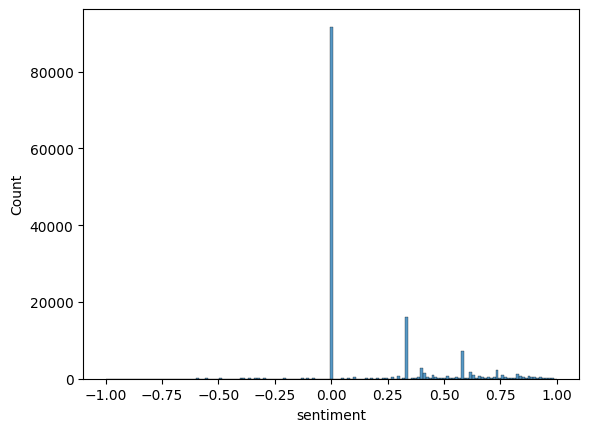

In [22]:
sns.histplot(
    data=df,
    x='sentiment'
)

In [31]:
df.value_counts("sentiment")

sentiment
0.0000    91673
0.3400    16068
0.5859     7291
0.7351     2167
0.4003     2134
          ...  
0.6133        1
0.6154        1
0.6169        1
0.6209        1
0.9993        1
Name: count, Length: 1607, dtype: int64

In [33]:
df_wo_zero = df[df["sentiment"] != 0]

<Axes: xlabel='sentiment', ylabel='Count'>

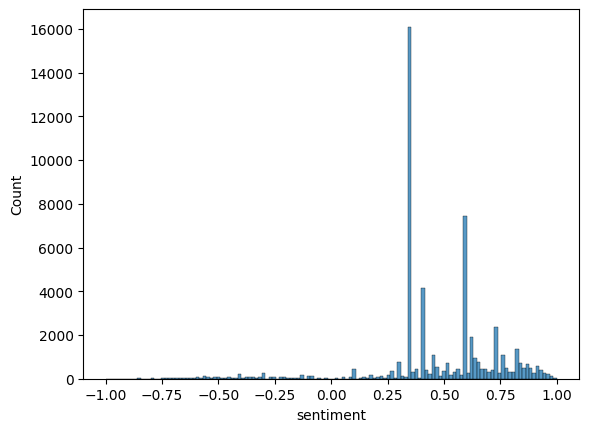

In [34]:
sns.histplot(
    data=df_wo_zero,
    x='sentiment'
)

In [24]:
negation_words = set(['nem','ne','sem','se', 'nincs','sincs' , 'soha', 'semmi', 'sehol', 'senki'])

In [26]:
def modify_sentiment(text):
    words = word_tokenize(text.lower())
    is_negation = False
    modified_words = []
    for word in words:
        if word in negation_words:
            is_negation = True
        elif word in ['tetszik', 'néz']:
            if is_negation:
                word = 'nem_' + word
            is_negation = False
        modified_words.append(word)
    return ' '.join(modified_words)

df['modified_text'] = df['text_no_sw'].apply(modify_sentiment)

print(df[['text_no_sw', 'modified_text']])

                                               text_no_sw  \
0       windows 9a microsoft híresztelések eddigiektől...   
1       start menü néz , metro appok ablakban futtatás...   
2       tetszik annyira ... hiányolom kikapcsoló gombo...   
3                                         shut down képen   
4       sokaknak megkönnyebbülés w9 , személy w8-at be...   
...                                                   ...   
146071  köszi , jelzett frissítések rendben , többi jö...   
146072  végülis tudtam megakadályozni , feltelepítse o...   
146073  adatmentő / visszaállító kérdés , hátha előbb ...   
146074  topikban kaptál válaszokat , linkelve lettek w...   
146075                          köszönöm , írok sikerül .   

                                            modified_text  
0       windows 9a microsoft híresztelések eddigiektől...  
1       start menü néz , metro appok ablakban futtatás...  
2       tetszik annyira ... hiányolom kikapcsoló gombo...  
3                          

In [44]:
additional_stop_words = {'is', 'ha', '``', '...'}
all_stop_words = stop.union(additional_stop_words)

In [45]:
filtered_words = [word for word in all_words if word not in string.punctuation and word not in all_stop_words]

In [46]:
all_words = []
for text in df['text_no_sw']:
    words = word_tokenize(text)
    all_words.extend(words)

freq_dist = FreqDist(filtered_words)

print("Most common words:")
for word, freq in freq_dist.most_common(20):
    print(f"{word}: {freq}")

Most common words:
windows: 32301
10: 15686
win: 14780
tudom: 13192
le: 11121
pl: 10648
sziasztok: 10312
rendszer: 9718
gép: 8336
frissítés: 8057
win10: 7963
se: 7925
..: 7528
köszi: 7037
működik: 6918
megy: 6897
gond: 6777
nálam: 6751
köszönöm: 6487
link: 6271
